In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'],index_col=0)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


<AxesSubplot:xlabel='date'>

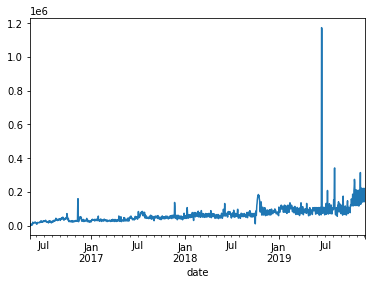

In [3]:
df['value'].plot()

#### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [4]:
df=df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))]

In [5]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


#### Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

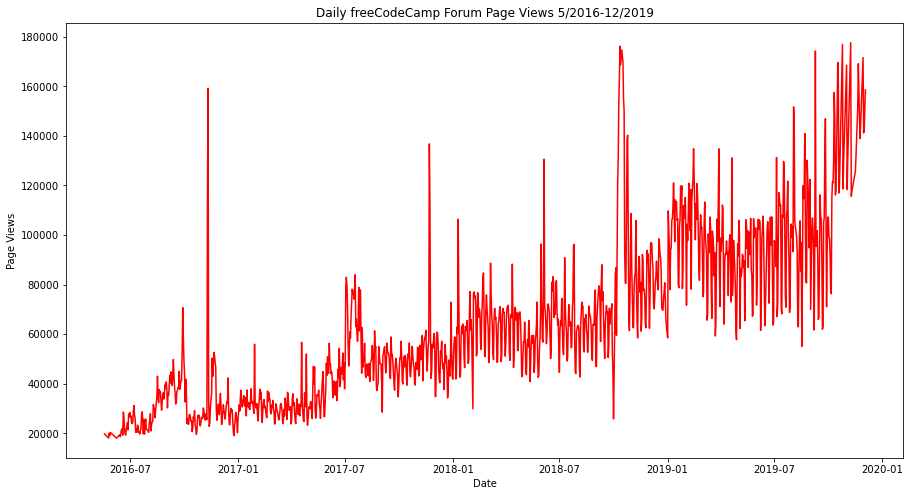

In [6]:
plt.figure(figsize = (15,8))
plt.xlabel("Date")  
plt.ylabel("Page Views")  
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")  
plt.plot(df,color='red')

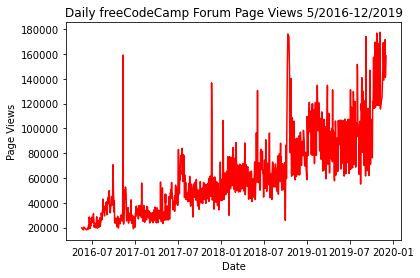

In [7]:
fig,ax=plt.subplots()
#plt.figure(figsize = (15,8))
plt.xlabel("Date")  
plt.ylabel("Page Views")  
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")  
plt.plot(df,color='red')

In [8]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


#### Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [9]:
df_bar=df.copy()
df_bar=df_bar['value'].resample('M').mean()
df_bar.head()

date
2016-05-31    19432.400000
2016-06-30    21875.105263
2016-07-31    24109.678571
2016-08-31    31049.193548
2016-09-30    41476.866667
Freq: M, Name: value, dtype: float64

In [10]:
df['value'].resample('M').mean().head()

date
2016-05-31    19432.400000
2016-06-30    21875.105263
2016-07-31    24109.678571
2016-08-31    31049.193548
2016-09-30    41476.866667
Freq: M, Name: value, dtype: float64

In [11]:
df_bar=df_bar.reset_index()
df_bar.head()

,date,value
0,2016-05-31,19432.400000
1,2016-06-30,21875.105263
2,2016-07-31,24109.678571
3,2016-08-31,31049.193548
4,2016-09-30,41476.866667


In [12]:
df_bar['year'] = df_bar['date'].dt.year
df_bar['month'] = df_bar['date'].dt.month

In [13]:
df_bar.head()

,date,value,year,month
0,2016-05-31,19432.400000,2016,5
1,2016-06-30,21875.105263,2016,6
2,2016-07-31,24109.678571,2016,7
3,2016-08-31,31049.193548,2016,8
4,2016-09-30,41476.866667,2016,9


In [14]:
MonthDict={ 1 : "January",
       2 : "February",
       3 : "March",
       4 : "April",
       5 : "May",
       6 : "June",
       7 : "July",
       8 : "August",
       9 : "September",
       10 : "October",
       11 : "November",
       12 : "December"
}

df_bar['month'] = df_bar['month'].map(MonthDict)
df_bar.head()

,date,value,year,month
0,2016-05-31,19432.400000,2016,May
1,2016-06-30,21875.105263,2016,June
2,2016-07-31,24109.678571,2016,July
3,2016-08-31,31049.193548,2016,August
4,2016-09-30,41476.866667,2016,September


In [15]:
df_bar.tail()

,date,value,year,month
39,2019-08-31,102717.310345,2019,August
40,2019-09-30,97268.833333,2019,September
41,2019-10-31,122802.272727,2019,October
42,2019-11-30,143166.428571,2019,November
43,2019-12-31,150733.500000,2019,December


In [16]:
df_bar.groupby(['year'])

In [17]:
# x = Year
# y = Average Page Views
# labels with month heading

<AxesSubplot:>

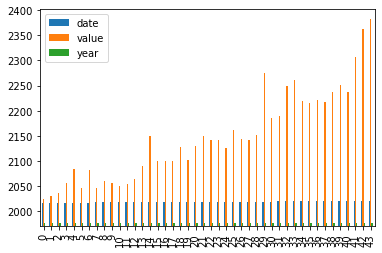

In [18]:
df_bar.plot(kind='bar')

<AxesSubplot:ylabel='year'>

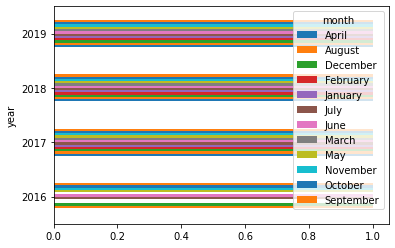

In [19]:
df_bar.groupby('year').month.value_counts().unstack().plot.barh()

<AxesSubplot:ylabel='month'>

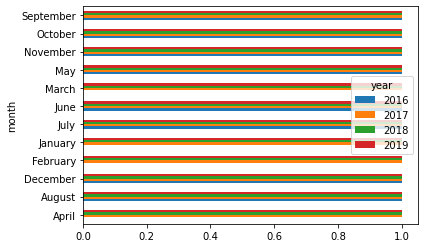

In [20]:
df_bar.groupby('year').month.value_counts().unstack(0).plot.barh()

In [21]:
test = df_bar.groupby('month').agg( test=('value','sum'))
test

,test
month,
April,182598.000000
August,244310.568409
December,307033.983871
February,202760.428571
January,193421.774194
July,250744.148464
June,226005.248120
March,183277.354839
May,201679.464516


In [22]:
df_bar.groupby(["year", "month"])["value"].count().unstack()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2016,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0
2017,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2018,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [23]:
df_bar.groupby(["year","month"]).first()

date          value
year month                              
2016 August    2016-08-31   31049.193548
     December  2016-12-31   27832.419355
     July      2016-07-31   24109.678571
     June      2016-06-30   21875.105263
     May       2016-05-31   19432.400000
     November  2016-11-30   40448.633333
     October   2016-10-31   27398.322581
     September 2016-09-30   41476.866667
2017 April     2017-04-30   30878.733333
     August    2017-08-31   47712.451613
     December  2017-12-31   48420.580645
     February  2017-02-28   31113.071429
     January   2017-01-31   32785.161290
     July      2017-07-31   65806.838710
     June      2017-06-30   43577.500000
     March     2017-03-31   29369.096774
     May       2017-05-31   34244.290323
     November  2017-11-30   57701.566667
     October   2017-10-31   47438.709677
     September 2017-09-30   47376.800000
2018 April     2018-04-30   62350.833333
     August    2018-08-31   62831.612903
     December  2018-12-31   80047.483871
     February  2018-02-28   65679.000000
     January   2018-01-31   58580.096774
     July      2018-07-31   63591.064516
     June      2018-06-30   70117.000000
     March     2018-03-31   62693.774194
     May       2018-05-31   56562.870968
     November  2018-11-30   78688.333333
     October   2018-10-31  111378.142857
     September 2018-09-30   65941.733333
2019 April     2019-04-30   89368.433333
     August    2019-08-31  102717.310345
     December  2019-12-31  150733.500000
     February  2019-02-28  105968.357143
     January   2019-01-31  102056.516129
     July      2019-07-31   97236.566667
     June      2019-06-30   90435.642857
     March     2019-03-31   91214.483871
     May       2019-05-31   91439.903226
     November  2019-11-30  143166.428571
     October   2019-10-31  122802.272727
     September 2019-09-30   97268.833333

<AxesSubplot:ylabel='year,month'>

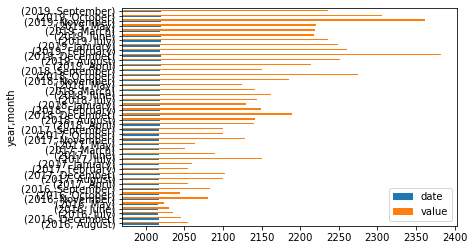

In [24]:
df_bar.groupby(["year","month"]).first().plot.barh()

In [25]:
df_bar.groupby(["year","month"]).first()

date          value
year month                              
2016 August    2016-08-31   31049.193548
     December  2016-12-31   27832.419355
     July      2016-07-31   24109.678571
     June      2016-06-30   21875.105263
     May       2016-05-31   19432.400000
     November  2016-11-30   40448.633333
     October   2016-10-31   27398.322581
     September 2016-09-30   41476.866667
2017 April     2017-04-30   30878.733333
     August    2017-08-31   47712.451613
     December  2017-12-31   48420.580645
     February  2017-02-28   31113.071429
     January   2017-01-31   32785.161290
     July      2017-07-31   65806.838710
     June      2017-06-30   43577.500000
     March     2017-03-31   29369.096774
     May       2017-05-31   34244.290323
     November  2017-11-30   57701.566667
     October   2017-10-31   47438.709677
     September 2017-09-30   47376.800000
2018 April     2018-04-30   62350.833333
     August    2018-08-31   62831.612903
     December  2018-12-31   80047.483871
     February  2018-02-28   65679.000000
     January   2018-01-31   58580.096774
     July      2018-07-31   63591.064516
     June      2018-06-30   70117.000000
     March     2018-03-31   62693.774194
     May       2018-05-31   56562.870968
     November  2018-11-30   78688.333333
     October   2018-10-31  111378.142857
     September 2018-09-30   65941.733333
2019 April     2019-04-30   89368.433333
     August    2019-08-31  102717.310345
     December  2019-12-31  150733.500000
     February  2019-02-28  105968.357143
     January   2019-01-31  102056.516129
     July      2019-07-31   97236.566667
     June      2019-06-30   90435.642857
     March     2019-03-31   91214.483871
     May       2019-05-31   91439.903226
     November  2019-11-30  143166.428571
     October   2019-10-31  122802.272727
     September 2019-09-30   97268.833333

Text(0, 0.5, 'Average Page Views')

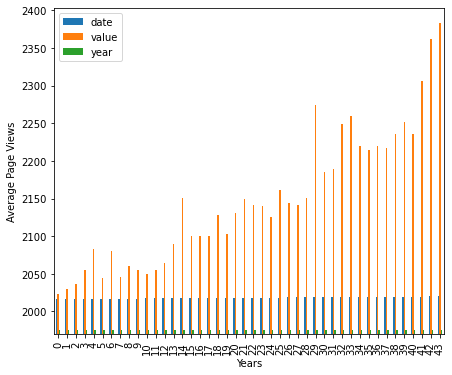

In [26]:
ax = df_bar.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

In [27]:
df_bar = pd.pivot_table(
	df_bar,
	values="value",
	index="year",
	columns="month",
	aggfunc=np.mean
)

In [28]:
df_bar.head()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,24109.678571,21875.105263,NaN,19432.400000,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


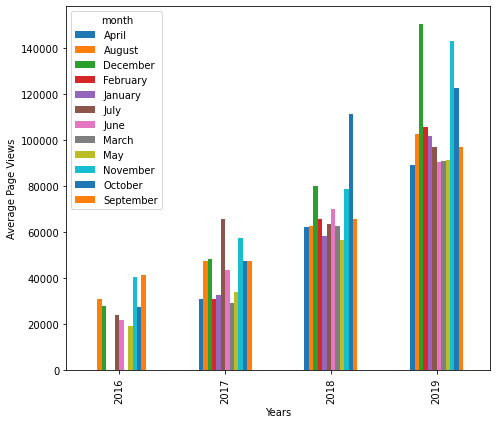

In [29]:
ax = df_bar.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")
plt.tight_layout()

In [30]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
# Create a column that has the year of each date recording
df["year"] = df.index.year
# Create a column that has the month (1-12) of each date recording
df["month"] = df.index.month
# Map the month integers to their proper names
df["month"] = df["month"].apply(
    lambda data: months[data-1]
)
# Make this a categorical column so it can be sorted by the order of values\
# in the `months` list, i.e., the proper month order
df["month"] = pd.Categorical(df["month"], categories=months)

Text(0, 0.5, 'Average Page Views')

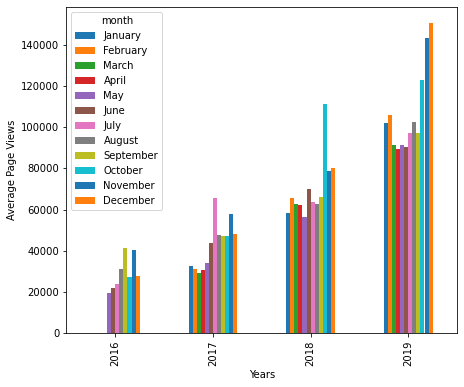

In [31]:
df_pivot = pd.pivot_table(
	df,
	values="value",
	index="year",
	columns="month",
	aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

# Use this to show the plot in a new window
# plt.show()

#### Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [32]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


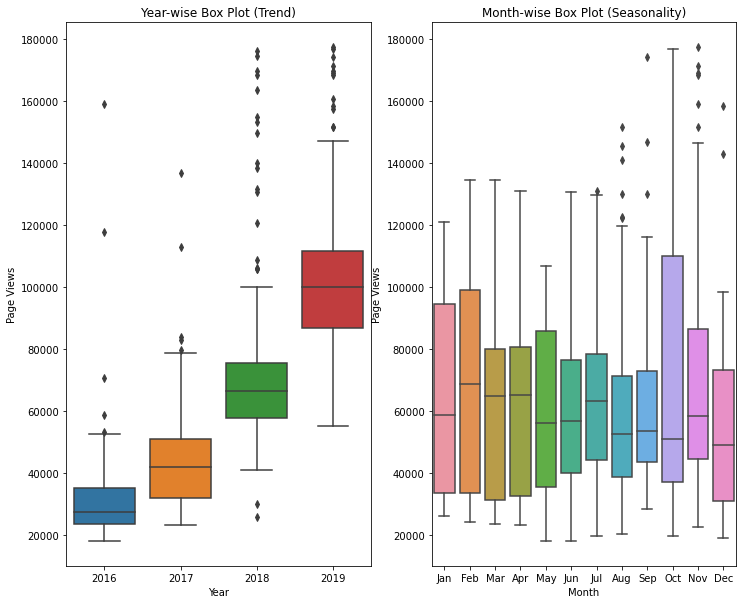

In [33]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
fig, axis = plt.subplots(1,2)
fig.set_size_inches(12,10)
sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axis[0]).set(xlabel='Year',ylabel='Page Views')
    
sns.boxplot(x=df_box['month'], y=df_box['value'], order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ax=axis[1]).set(xlabel='Month',ylabel='Page Views')

axis[0].set_title('Year-wise Box Plot (Trend)')
axis[1].set_title('Month-wise Box Plot (Seasonality)')

plt.show()

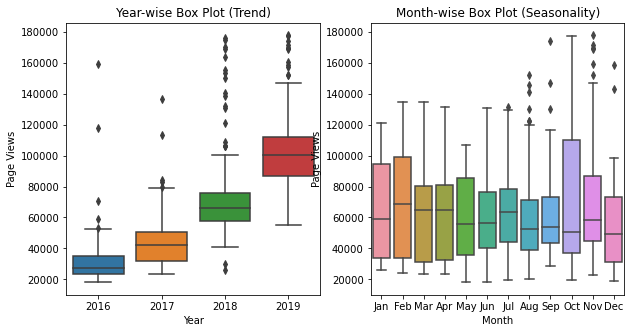

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(5)
    
ax1=sns.boxplot(x=df_box['year'], y=df_box['value'], ax=ax1)
ax1.set(xlabel='Year', ylabel='Page Views')
ax1.axes.set_title('Year-wise Box Plot (Trend)')

ax2=sns.boxplot(x='month', y='value', data=df_box, order=['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax=ax2)
ax2.set (xlabel='Month', ylabel='Page Views')
ax2.axes.set_title('Month-wise Box Plot (Seasonality)')
plt.show()

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'],index_col=0)

# Clean data
df=df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))]

def draw_line_plot():
    # Draw line plot
    fig,ax=plt.subplots()
    plt.xlabel("Date")  
    plt.ylabel("Page Views")  
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")  
    plt.plot(df,color='red')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar=df.copy()
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    # Create a column that has the year of each date recording
    df_bar["year"] = df_bar.index.year
    # Create a column that has the month (1-12) of each date recording
    df_bar["month"] = df_bar.index.month
    # Map the month integers to their proper names
    df_bar["month"] = df_bar["month"].apply(lambda data: months[data-1])
    # Make this a categorical column so it can be sorted by the order of values\
    # in the `months` list, i.e., the proper month order
    df_bar["month"] = pd.Categorical(df_bar["month"], categories=months)

    # Draw bar plot
    df_bar = pd.pivot_table(df_bar,values="value",index="year",columns="month",aggfunc=np.mean)

    # Plot a bar chart using the DF
    ax = df_bar.plot(kind="bar")
    # Get a Matplotlib figure from the axes object for formatting purposes
    fig = ax.get_figure()
    # Change the plot dimensions (width, height)
    fig.set_size_inches(7, 6)
    # Change the axes labels
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(10)
    fig.set_figheight(5)
    
    ax1=sns.boxplot(x=df_box['year'], y=df_box['value'], ax=ax1)
    ax1.set(xlabel='Year', ylabel='Page Views')
    ax1.axes.set_title('Year-wise Box Plot (Trend)')

    ax2=sns.boxplot(x='month', y='value', data=df_box, order=['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax=ax2)
    ax2.set (xlabel='Month', ylabel='Page Views')
    ax2.axes.set_title('Month-wise Box Plot (Seasonality)')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
